In [1]:
import os 
os.chdir('../../../../')
print("Current working directory is now: ", os.getcwd())

import pandas as pd 
import numpy as np
import csv
import utils.baseline_functions as base

# restore saved variables 
%store -r summary_drug_two_year

Current working directory is now:  C:\Users\Caroline Wang\OneDrive\Duke\Criminal Recidivism\psa-analysis


C:\Users\Caroline Wang\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Get Baseline Results

In [2]:
### train data
data = pd.read_csv("broward/data/broward_data.csv")
x = data.loc[:,:'five_year']
y = data['recid_drug2'].values

In [4]:
#### Logistic
c = [1e-5, 1e-4, 1e-3, 1e-2]
logistic_summary = base.Logistic(X=x,
                                 Y=y, 
                                 C=c,
                                 seed=816)

#### Lasso
c = [1e-2, 0.1, 1]
lasso_summary = base.Lasso(X=x,
                           Y=y,
                           C=c,
                           seed=816)

#### LinearSVM
c = [1e-5, 1e-4, 1e-3]
svm_summary = base.LinearSVM(X=x,
                             Y=y,
                             C=c,
                             seed=816)

#### CART
depth = [1, 2]
impurity = [0.001, 0.003, 0.005]
split = [2,3,4]
cart_summary = base.CART(X=x,
                         Y=y,
                         depth=depth,
                         split=split,
                         impurity=impurity, 
                         seed=816)

#### Random Forest
n_estimators =  [20,40,60]
depth = [1,2]
impurity = [0.003, 0.005]
rf_summary = base.RF(X=x,
                     Y=y, 
                     depth=depth, 
                     estimators=n_estimators, 
                     impurity=impurity,
                     seed=816)

#### XGBoost
learning_rate = [0.05,0.07]
depth = [2,3]
n_estimators = [20]
gamma = [10,12,14]
child_weight = [10,12,14]
subsample = [0.3, 0.5]
xgb_summary = base.XGB(X=x,
                       Y=y,
                       learning_rate=learning_rate, 
                       depth=depth, 
                       estimators=n_estimators,
                       gamma=gamma, 
                       child_weight=child_weight, 
                       subsample=subsample, 
                       seed=816)

#### save results 
summary_drug_two_year = {"Logistic": logistic_summary,
                         "Lasso": lasso_summary,
                         "LinearSVM": svm_summary,
                         "CART": cart_summary, 
                         "RF": rf_summary,
                         "XGBoost": xgb_summary
                        }

%store summary_drug_two_year

model_id, score_thresholds 1 {'rank_abs': [94]}
get_disparity_predefined_group()
model_id, score_thresholds 1 {'rank_abs': [101]}
get_disparity_predefined_group()
model_id, score_thresholds 1 {'rank_abs': [94]}
get_disparity_predefined_group()
model_id, score_thresholds 1 {'rank_abs': [92]}
get_disparity_predefined_group()
model_id, score_thresholds 1 {'rank_abs': [112]}
get_disparity_predefined_group()
model_id, score_thresholds 1 {'rank_abs': [90]}
get_disparity_predefined_group()
model_id, score_thresholds 1 {'rank_abs': [99]}
get_disparity_predefined_group()
model_id, score_thresholds 1 {'rank_abs': [86]}
get_disparity_predefined_group()
model_id, score_thresholds 1 {'rank_abs': [91]}
get_disparity_predefined_group()
model_id, score_thresholds 1 {'rank_abs': [119]}
get_disparity_predefined_group()
model_id, score_thresholds 1 {'rank_abs': [1]}
get_disparity_predefined_group()
model_id, score_thresholds 1 {'rank_abs': [0]}
get_disparity_predefined_group()
model_id, score_thresholds 

C:\Users\Caroline Wang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


model_id, score_thresholds 1 {'rank_abs': [0]}
get_disparity_predefined_group()


C:\Users\Caroline Wang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


model_id, score_thresholds 1 {'rank_abs': [0]}
get_disparity_predefined_group()


C:\Users\Caroline Wang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


model_id, score_thresholds 1 {'rank_abs': [0]}
get_disparity_predefined_group()


C:\Users\Caroline Wang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


model_id, score_thresholds 1 {'rank_abs': [0]}
get_disparity_predefined_group()


C:\Users\Caroline Wang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


model_id, score_thresholds 1 {'rank_abs': [0]}
get_disparity_predefined_group()
Stored 'summary_drug_two_year' (dict)


In [5]:
results = [[model_name, np.mean(model_summary["holdout_test_auc"]), np.mean(model_summary["auc_diffs"])] \
          for model_name, model_summary in summary_drug_two_year.items()]
results

[['Logistic', 0.6964407000611702, 0.04297444378754518],
 ['Lasso', 0.6922181754145875, 0.023969768897161892],
 ['LinearSVM', 0.6943848077320931, 0.0411027808994016],
 ['CART', 0.6362388977391955, 0.03216264372495723],
 ['RF', 0.6701021839446463, 0.048157263873468636],
 ['XGBoost', 0.6888137396488957, 0.02078948192389065]]

In [7]:
params = [[model_name, model_summary['best_param']] for model_name, model_summary in summary_drug_two_year.items()]
params

[['Logistic',
  [{'C': 0.001}, {'C': 0.001}, {'C': 0.001}, {'C': 0.001}, {'C': 0.01}]],
 ['Lasso', [{'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.01}, {'C': 0.1}]],
 ['LinearSVM',
  [{'C': 0.001}, {'C': 0.001}, {'C': 0.001}, {'C': 0.0001}, {'C': 0.001}]],
 ['CART',
  [{'max_depth': 2, 'min_impurity_decrease': 0.001, 'min_samples_split': 2},
   {'max_depth': 2, 'min_impurity_decrease': 0.001, 'min_samples_split': 2},
   {'max_depth': 2, 'min_impurity_decrease': 0.001, 'min_samples_split': 2},
   {'max_depth': 1, 'min_impurity_decrease': 0.001, 'min_samples_split': 2},
   {'max_depth': 2, 'min_impurity_decrease': 0.003, 'min_samples_split': 2}]],
 ['RF',
  [{'max_depth': 2, 'min_impurity_decrease': 0.003, 'n_estimators': 60},
   {'max_depth': 2, 'min_impurity_decrease': 0.003, 'n_estimators': 60},
   {'max_depth': 2, 'min_impurity_decrease': 0.003, 'n_estimators': 60},
   {'max_depth': 2, 'min_impurity_decrease': 0.003, 'n_estimators': 40},
   {'max_depth': 2, 'min_impurity_decrease': 0

In [34]:
path = "C:\\Users\\binha\\Documents\\Duke\\Cynthia Research\\KY-analysis-mytrials\\broward\\broward models\\model results\\Baselines\\Two Year\\"
results = [["Drug", np.str((round(np.mean(logistic_summary['holdout_test_auc']), 3))) + " (" + np.str(round(np.std(logistic_summary['holdout_test_auc']), 3)) + ")", 
            np.str(round(np.mean(lasso_summary['holdout_test_auc']),3)) + " (" + np.str(round(np.std(lasso_summary['holdout_test_auc']), 3)) + ")", 
            np.str(round(np.mean(svm_summary['holdout_test_auc']),3)) + " (" + np.str(round(np.std(svm_summary['holdout_test_auc']), 3)) + ")", 
            np.str(round(np.mean(cart_summary['holdout_test_auc']),3)) + " (" + np.str(round(np.std(cart_summary['holdout_test_auc']), 3)) + ")", 
            np.str(round(np.mean(rf_summary['holdout_test_auc']),3)) + " (" + np.str(round(np.std(rf_summary['holdout_test_auc']), 3)) + ")", 
            np.str(round(np.mean(xgb_summary['holdout_test_auc']),3)) + " (" + np.str(round(np.std(xgb_summary['holdout_test_auc']), 3)) + ")"]]
with open(path + 'Two Year Baseline Summary.csv', 'a') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(results)

## Plotting Fairness

In [ ]:
import matplotlib.pyplot as plt


In [52]:
fairness = pd.concat({model_name: model_summary['fairness_overview'][0] for model_name, model_summary in summary_drug_two_year.items()},
                    names=['baseline_model']).reset_index()
del fairness["level_1"]
fairness

baseline_model attribute_name   attribute_value       tpr       tnr  \
0        Logistic            sex            female  0.486486  0.777419   
1        Logistic            sex              male  0.833333  0.947368   
2        Logistic           race  African-American  0.483871  0.725806   
3        Logistic           race             Asian       NaN  1.000000   
4        Logistic           race         Caucasian  0.777778  0.868852   
5        Logistic           race          Hispanic  0.333333  0.789474   
6        Logistic           race   Native American       NaN  1.000000   
7        Logistic           race             Other       NaN  1.000000   
8           Lasso            sex            female  0.486486  0.793548   
9           Lasso            sex              male  0.833333  0.921053   
10          Lasso           race  African-American  0.451613  0.758065   
11          Lasso           race             Asian       NaN  1.000000   
12          Lasso           race         Caucasian  0.888889  0.852459   
13          Lasso           race          Hispanic  0.333333  0.842105   
14          Lasso           race   Native American       NaN  0.500000   
15          Lasso           race             Other       NaN  1.000000   
16      LinearSVM            sex            female  0.027027  1.000000   
17      LinearSVM            sex              male  0.000000  1.000000   
18      LinearSVM           race  African-American  0.032258  1.000000   
19      LinearSVM           race             Asian       NaN  1.000000   
20      LinearSVM           race         Caucasian  0.000000  1.000000   
21      LinearSVM           race          Hispanic  0.000000  1.000000   
22      LinearSVM           race   Native American       NaN  1.000000   
23      LinearSVM           race             Other       NaN  1.000000   
24           CART            sex            female  0.000000  1.000000   
25           CART            sex              male  0.000000  1.000000   
26           CART           race  African-American  0.000000  1.000000   
27           CART           race             Asian       NaN  1.000000   
28           CART           race         Caucasian  0.000000  1.000000   
29           CART           race          Hispanic  0.000000  1.000000   
30           CART           race   Native American       NaN  1.000000   
31           CART           race             Other       NaN  1.000000   
32             RF            sex            female  0.000000  1.000000   
33             RF            sex              male  0.000000  1.000000   
34             RF           race  African-American  0.000000  1.000000   
35             RF           race             Asian       NaN  1.000000   
36             RF           race         Caucasian  0.000000  1.000000   
37             RF           race          Hispanic  0.000000  1.000000   
38             RF           race   Native American       NaN  1.000000   
39             RF           race             Other       NaN  1.000000   
40        XGBoost            sex            female  0.000000  1.000000   
41        XGBoost            sex              male  0.000000  1.000000   
42        XGBoost           race  African-American  0.000000  1.000000   
43        XGBoost           race             Asian       NaN  1.000000   
44        XGBoost           race         Caucasian  0.000000  1.000000   
45        XGBoost           race          Hispanic  0.000000  1.000000   
46        XGBoost           race   Native American       NaN  1.000000   
47        XGBoost           race             Other       NaN  1.000000   

         for       fdr       fpr       fnr       npv  ...  TPR Parity  \
0   0.073077  0.793103  0.222581  0.513514  0.926923  ...       False   
1   0.027027  0.285714  0.052632  0.166667  0.972973  ...        True   
2   0.105960  0.772727  0.274194  0.516129  0.894040  ...       False   
3   0.000000       NaN  0.000000       NaN  1.000000  ...         NaN   
4   0.01851

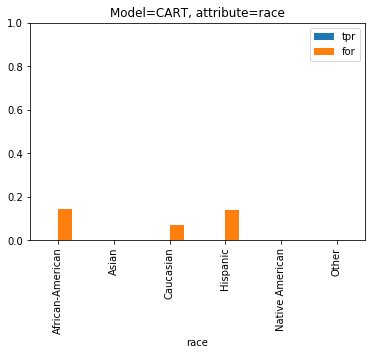

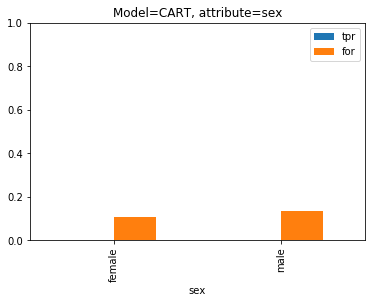

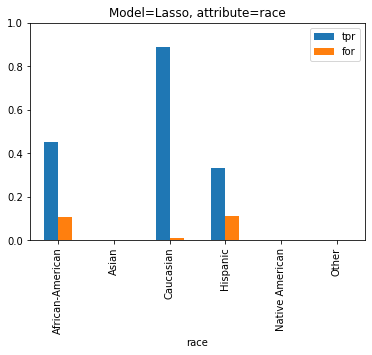

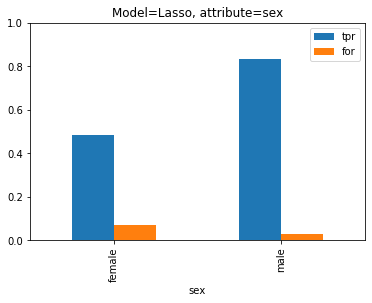

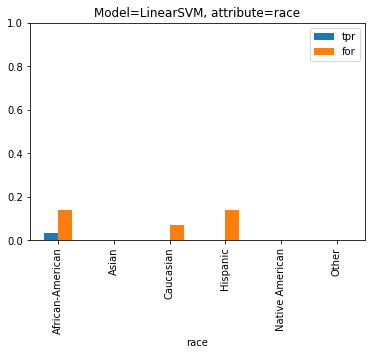

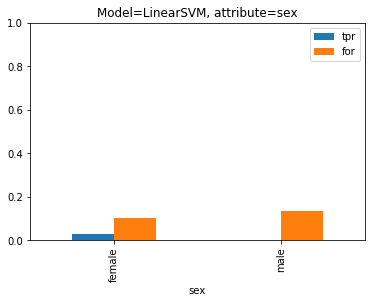

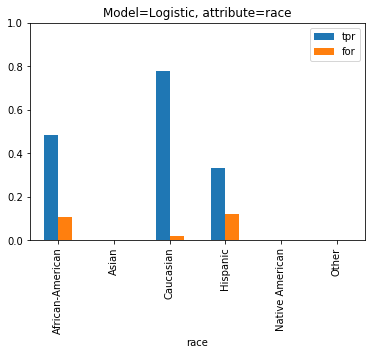

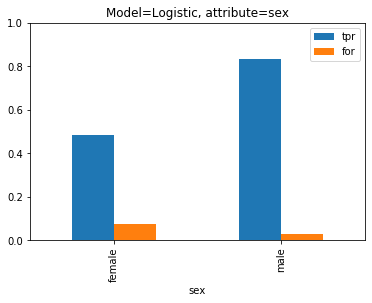

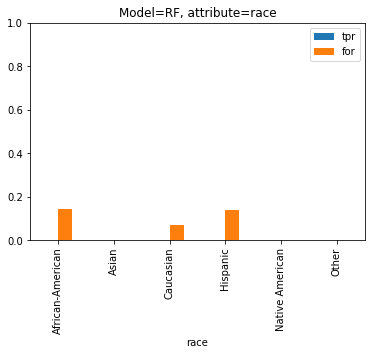

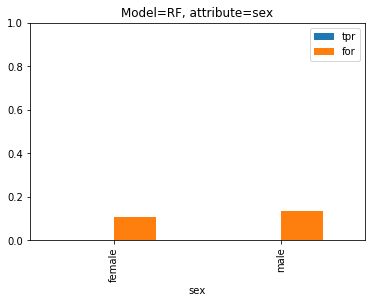

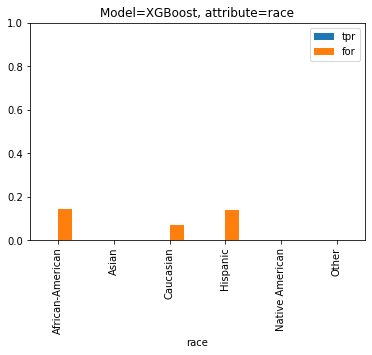

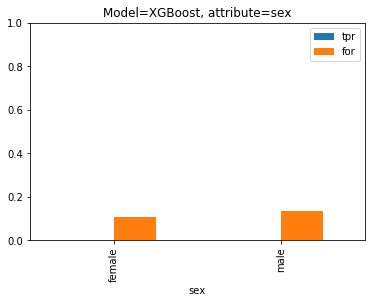

In [84]:
# by model type 
for (model_name, attribute_type), grouped_df in fairness.groupby(["baseline_model", "attribute_name"]):
    df = grouped_df[["attribute_value","tpr", "for"]].set_index("attribute_value")
    ax = df.plot.bar(title=f"Model={model_name}, attribute={attribute_type}", ylim=[0,1])
    ax.set_xlabel(attribute_type)

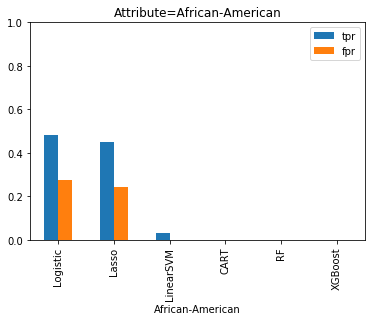

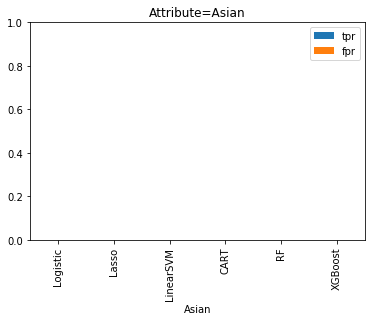

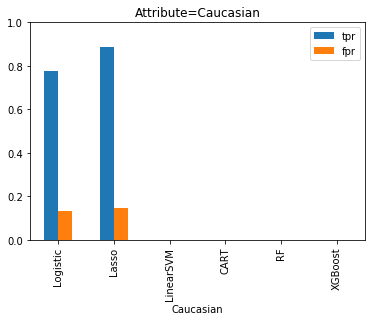

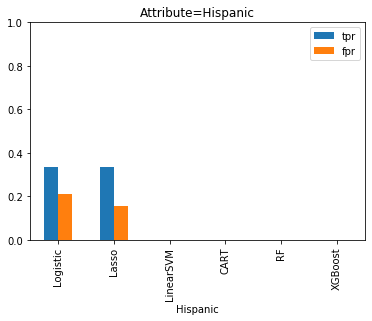

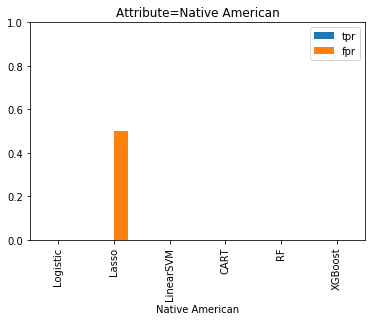

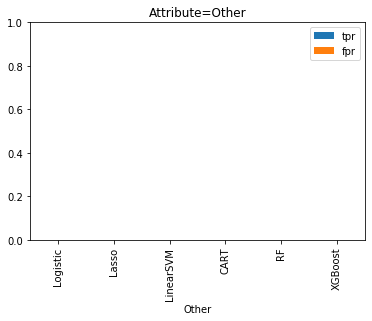

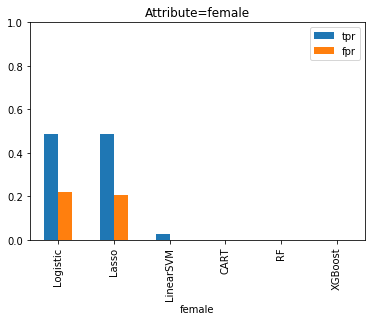

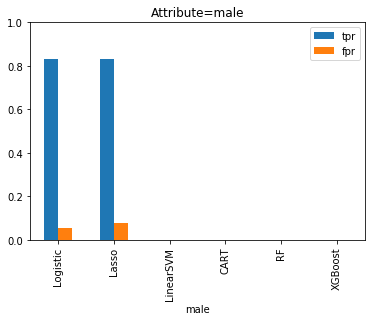

In [85]:
# by sensitive attribute type 
for attribute, grouped_df in fairness.groupby("attribute_value"):
    df = grouped_df[["baseline_model","tpr", "fpr"]].set_index("baseline_model")
    ax = df.plot.bar(title=f"Attribute={attribute}", ylim=[0,1])
    ax.set_xlabel("Baseline Model")